<a href="https://colab.research.google.com/github/Muluken1Walle/Suicide-Rates/blob/main/suicideProjectyByMuluken.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 
import os 
import pandas as pd
from scipy import stats
import pycountry
import geopandas



In [5]:
pip install geopandas

In [3]:
pip install pycountry

     |████████████████████████████████| 10.1 MB 7.9 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for pycountry: filename=pycountry-22.3.5-py2.py3-none-any.whl size=10681845 sha256=bf1bf8705a2fc302cff20389d9dbfa5720f5642783bd6e5769570e7b97a17912
  Stored in directory: /root/.cache/pip/wheels/0e/06/e8/7ee176e95ea9a8a8c3b3afcb1869f20adbd42413d4611c6eb4
Successfully built pycountry


In [6]:
df = pd.read_csv('/content/drive/MyDrive/master.csv')

In [7]:
df.isna().sum()


country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64

In [8]:
df=df.drop('HDI for year' ,axis=1)
df

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,"2,156,624,900",796,Boomers
...,...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,"63,067,077,179",2309,Generation Z


In [9]:
df.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', ' gdp_for_year ($) ',
       'gdp_per_capita ($)', 'generation'],
      dtype='object')

In [10]:
#Rename the columns
df.rename(columns={"suicides/100k pop":"suicides_pop",
 " gdp_for_year ($) ":"gdp_for_year"," gdp_per_capita ($) ":"gdp_per_capita",
 "gdp_per_capita ($)":"gdp_per_capita"}, inplace=True)

In [11]:
df.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides_pop', 'country-year', 'gdp_for_year', 'gdp_per_capita',
       'generation'],
      dtype='object')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   country         27820 non-null  object 
 1   year            27820 non-null  int64  
 2   sex             27820 non-null  object 
 3   age             27820 non-null  object 
 4   suicides_no     27820 non-null  int64  
 5   population      27820 non-null  int64  
 6   suicides_pop    27820 non-null  float64
 7   country-year    27820 non-null  object 
 8   gdp_for_year    27820 non-null  object 
 9   gdp_per_capita  27820 non-null  int64  
 10  generation      27820 non-null  object 
dtypes: float64(1), int64(4), object(6)
memory usage: 2.3+ MB


In [13]:
 # Select only object type columns 
object_cols = df.select_dtypes(include='object')
object_cols

,country,sex,age,country-year,gdp_for_year,generation
0,Albania,male,15-24 years,Albania1987,"2,156,624,900",Generation X
1,Albania,male,35-54 years,Albania1987,"2,156,624,900",Silent
2,Albania,female,15-24 years,Albania1987,"2,156,624,900",Generation X
3,Albania,male,75+ years,Albania1987,"2,156,624,900",G.I. Generation
4,Albania,male,25-34 years,Albania1987,"2,156,624,900",Boomers
...,...,...,...,...,...,...
27815,Uzbekistan,female,35-54 years,Uzbekistan2014,"63,067,077,179",Generation X
27816,Uzbekistan,female,75+ years,Uzbekistan2014,"63,067,077,179",Silent
27817,Uzbekistan,male,5-14 years,Uzbekistan2014,"63,067,077,179",Generation Z
27818,Uzbekistan,female,5-14 years,Uzbekistan2014,"63,067,077,179",Generation Z


In [14]:
#Change the dtat type from object to int64
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [42]:
df['age']= le.fit_transform(df['age'])
df['gdp_for_year']= le.fit_transform(df['gdp_for_year'])

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   country         27820 non-null  object 
 1   year            27820 non-null  int64  
 2   sex             27820 non-null  object 
 3   age             27820 non-null  int64  
 4   suicides_no     27820 non-null  int64  
 5   population      27820 non-null  int64  
 6   suicides_pop    27820 non-null  float64
 7   country-year    27820 non-null  object 
 8   gdp_for_year    27820 non-null  int64  
 9   gdp_per_capita  27820 non-null  int64  
 10  generation      27820 non-null  object 
dtypes: float64(1), int64(6), object(4)
memory usage: 2.3+ MB


In [17]:
object_cols

,country,sex,age,country-year,gdp_for_year,generation
0,Albania,male,15-24 years,Albania1987,"2,156,624,900",Generation X
1,Albania,male,35-54 years,Albania1987,"2,156,624,900",Silent
2,Albania,female,15-24 years,Albania1987,"2,156,624,900",Generation X
3,Albania,male,75+ years,Albania1987,"2,156,624,900",G.I. Generation
4,Albania,male,25-34 years,Albania1987,"2,156,624,900",Boomers
...,...,...,...,...,...,...
27815,Uzbekistan,female,35-54 years,Uzbekistan2014,"63,067,077,179",Generation X
27816,Uzbekistan,female,75+ years,Uzbekistan2014,"63,067,077,179",Silent
27817,Uzbekistan,male,5-14 years,Uzbekistan2014,"63,067,077,179",Generation Z
27818,Uzbekistan,female,5-14 years,Uzbekistan2014,"63,067,077,179",Generation Z


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


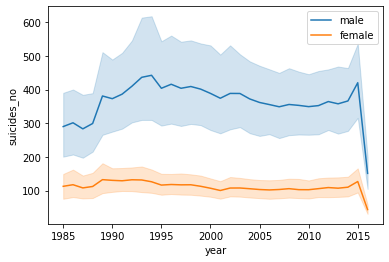

In [18]:
#The Factor of  of sex Suicide Rate.
#No matter which year it is, the suicides number of male are about three times higher than of female
df_men = df[df.sex == "male"]
df_women = df[df.sex == "female"]
sns.lineplot(df_men.year, df.suicides_no)
sns.lineplot(df_women.year, df.suicides_no )
plt.legend(["male", 'female'])
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


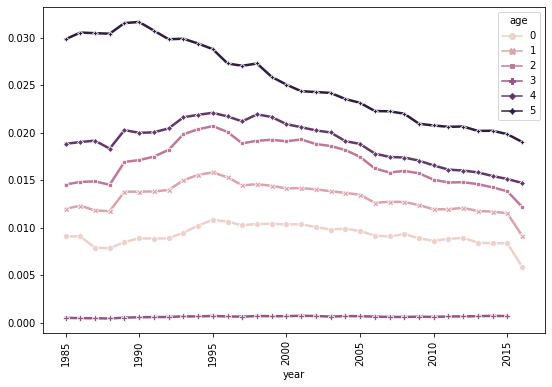

In [45]:
#The Factor of  of Age Suicide Rate.
#the suicide rate is getting higher when the age is higher. That is, age is a factor of suicide.
df_age = df.groupby(["year","age"])["suicides_no", "population"].sum()
df_reset = df_age.copy().reset_index()
plt.figure(figsize=(9,6))
sns.lineplot("year", df_reset.suicides_no*100/df_reset.population, hue = "age",
             data = df_reset, linewidth = 2.5, style = "age", markers=True
            , dashes=False)
plt.xticks(rotation = 90)
plt.show()

In [20]:
#Arange the country list and see how many countries are in the dataset, then calculate the suicide rate of countries.
df1 = df.groupby("country")["suicides_no"].sum()
country_name = list(df1.index.get_level_values(0))
len(country_name)

101

In [21]:
#I'll map the suicide rate afterward, so I need to transfer the country name into country code. I choose alpha2 country code.
countries = {}
for country in pycountry.countries:
    countries[country.name] = country.alpha_2

In [22]:
# name if the name in country list are not the same.
country_not_in_list = [i for i in country_name[:] if i not in countries.keys()]
country_not_in_list

['Czech Republic',
 'Macau',
 'Republic of Korea',
 'Saint Vincent and Grenadines']

In [54]:
#I found that there are four country names are different, so I rename these names
df['country']=df['country'].replace({"Republic of Korea": "Korea Republic of",'Czech Republic': "Czechia", 'Macau': 'Macao',
              'Saint Vincent and Grenadines': "Saint Vincent and the Grenadines"})


In [53]:
#Before ploting the suicide rate of each countries, we calcuate the suicide rate for each year, and then take the average of number as rate.
df_SNo = df.groupby(["country","year"])["suicides_no"].sum()
df_sum = df_SNo.sort_index(ascending=True)[:] * 100

In [25]:
df_pop = df.groupby(["country","year"]).population.sum()
df_pop_sum = df_pop.sort_index(ascending=False)[:]

In [26]:
df_total = df_sum / df_pop_sum
df_total.head(10)

country  year
Albania  1987    0.002694
         1988    0.002279
         1989    0.002426
         1992    0.001665
         1993    0.002600
         1994    0.001755
         1995    0.003031
         1996    0.003027
         1997    0.005710
         1998    0.005112
dtype: float64

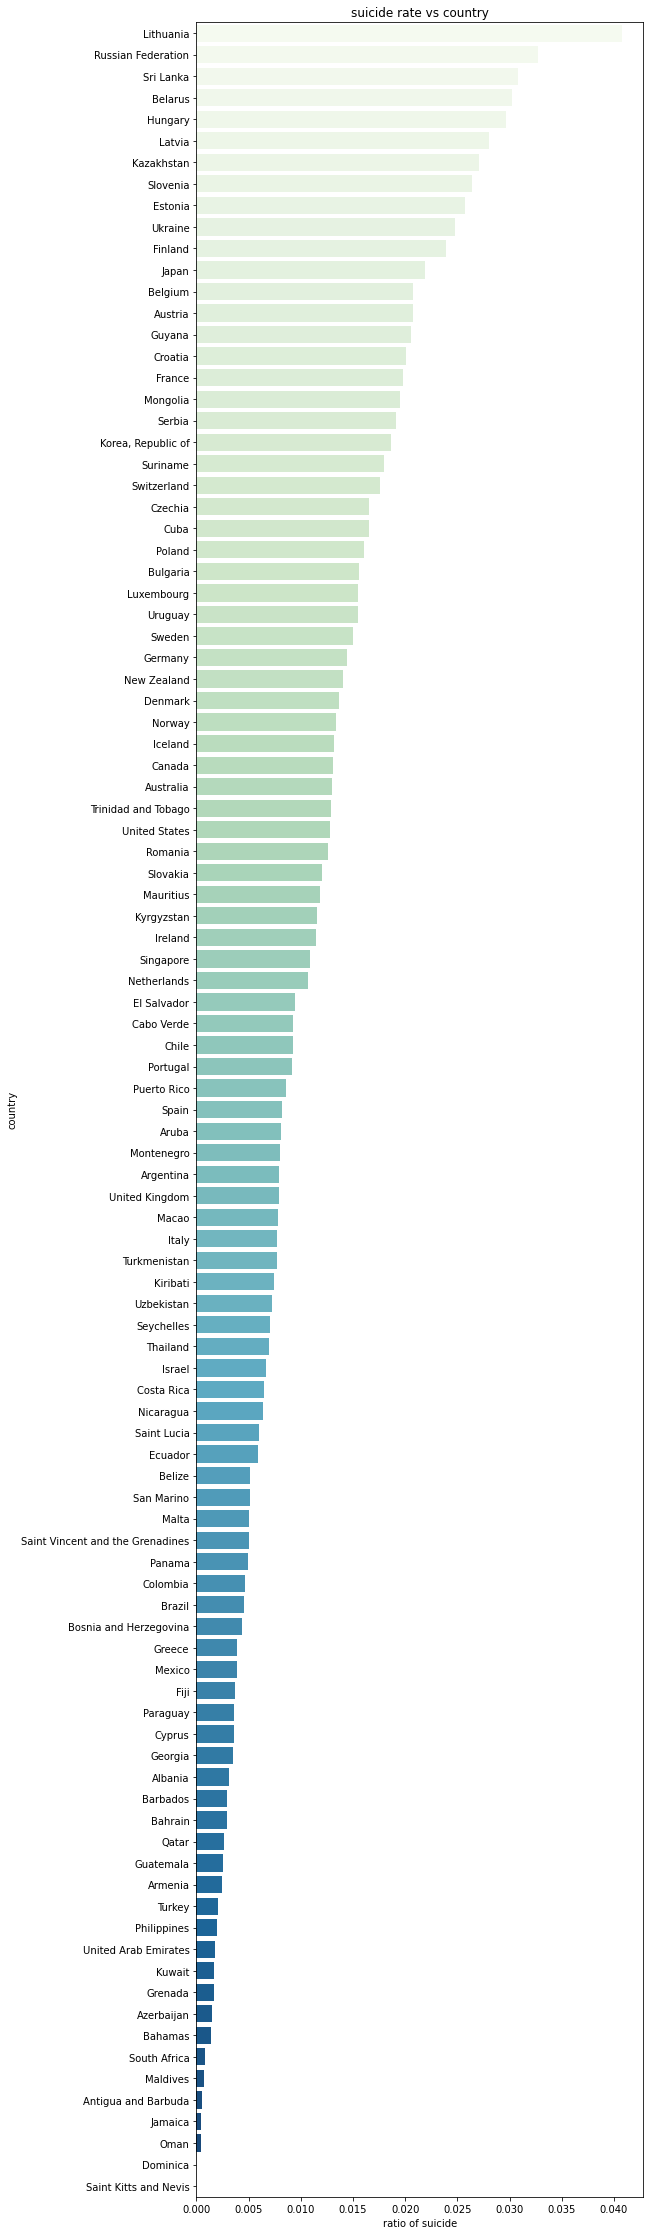

In [55]:
#plot the top 20 countries.
plt.figure(figsize=(8,40))
sns.barplot(x=country_suicide[:],y=country_list[:], palette="GnBu")
plt.xlabel("ratio of suicide")
plt.ylabel("country")
plt.title("suicide rate vs country")
plt.show()

In [29]:
#Use geopandas library to get information of countries, including coordinate.
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
cities = geopandas.read_file(geopandas.datasets.get_path('naturalearth_cities'))
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


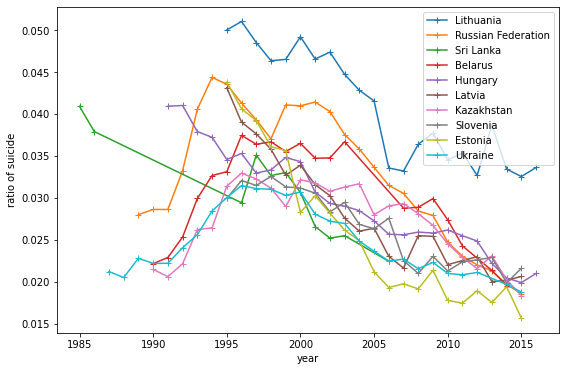

In [65]:
plt.figure(figsize = (9,6))
for country in country_list[:10]:
    plt.plot(df_total[country].index,df_total[country].values, label=country, marker="+")
plt.xlabel("year")
plt.ylabel("ratio of suicide")
plt.legend()
plt.show()

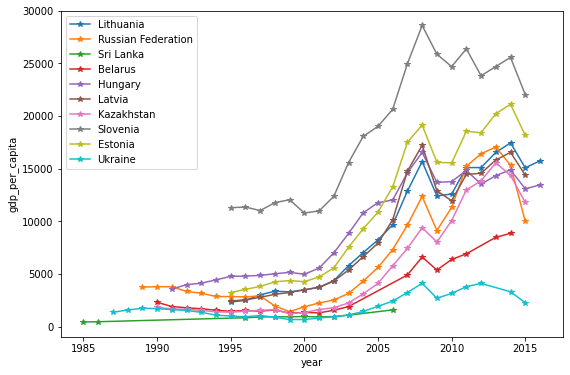

In [58]:
plt.figure(figsize = (9,6))
df_gdp = df.groupby(["country","year"]).gdp_per_capita.mean()
for country in country_list[:10]:
    plt.plot(df_gdp[country].index,df_gdp[country].values, label=country, marker="*")
plt.xlabel("year")
plt.ylabel("gdp_per_capita")
plt.legend()
plt.show()

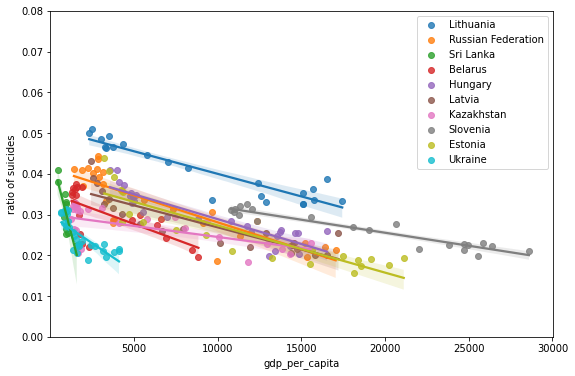

In [63]:
plt.figure(figsize = (9,6))
for country in country_list[:10]:
    sns.regplot(x=df_gdp[country].values, y=df_total[country].values, label = country)
plt.xlabel("gdp_per_capita")
plt.ylabel("ratio of suicides")
plt.ylim(0,0.08)
plt.xlim(1)
plt.legend()
plt.show()

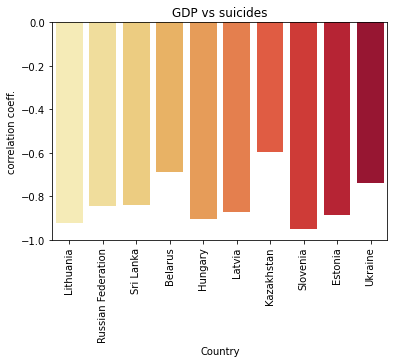

In [66]:
corr_eff = {}
for country in country_list[:10]:
    slope, intercept, r_value, p_value, std_err = stats.linregress(df_gdp[country].values,df_total[country].values)
    corr_eff[country] = float(r_value)
    
sns.barplot(x=list(corr_eff.keys()), y=list(corr_eff.values()), palette = "YlOrRd")
plt.xticks(rotation = 90)
plt.xlabel("Country")
plt.ylabel("correlation coeff.")
plt.title("GDP vs suicides")
plt.show()

/usr/local/lib/python3.7/dist-packages/scipy/stats/_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
/usr/local/lib/python3.7/dist-packages/scipy/stats/_stats_mstats_common.py:140: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
/usr/local/lib/python3.7/dist-packages/scipy/stats/_stats_mstats_common.py:142: RuntimeWarning: invalid value encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


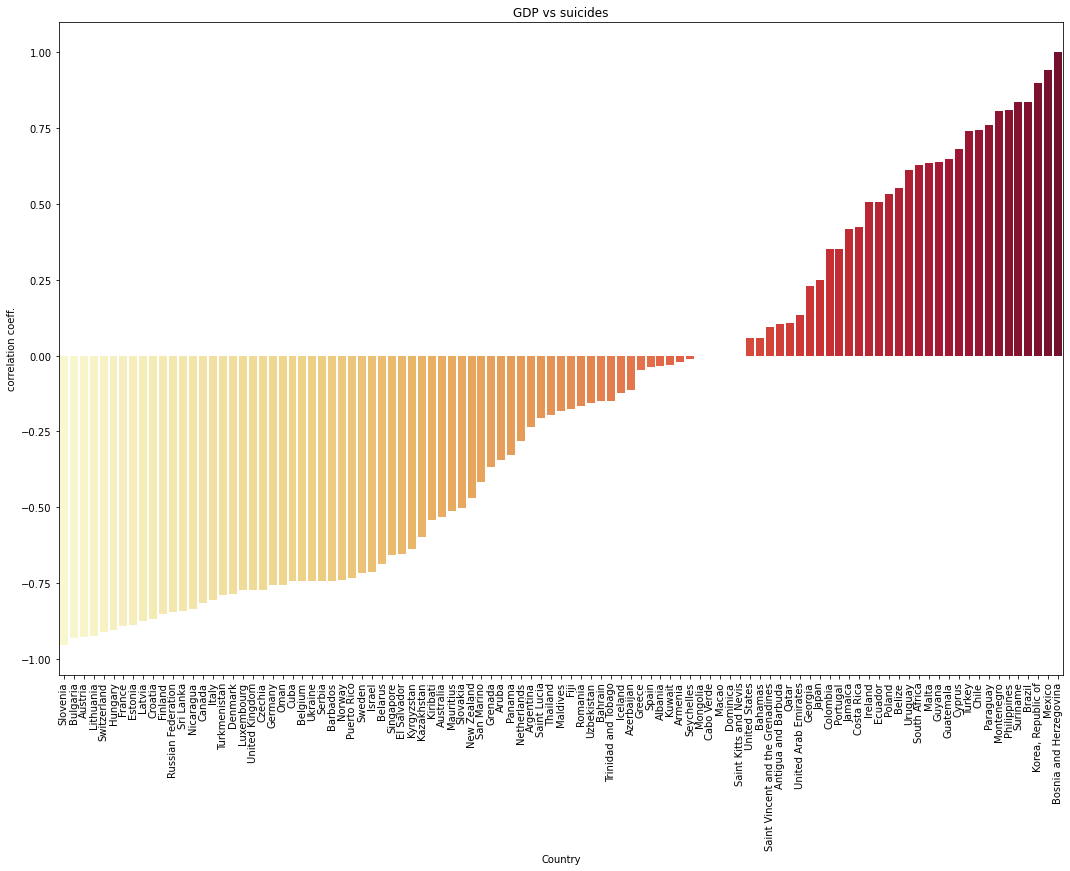

In [67]:
corr_eff = {}
p_value_eff = {}
for country in country_list[:]:
    slope, intercept, r_value, p_value, std_err = stats.linregress(df_gdp[country].values, df_total[country].values)
    corr_eff[country] = float(r_value)
    p_value_eff[country] = float(p_value)

gdp_tup = list(corr_eff.items())
gdp_tup.sort(key= lambda pair:pair[1], reverse = False)
dgp_relation = {a[0]:a[1] for a in gdp_tup}

plt.figure(figsize=(18,12))
sns.barplot(x=list(dgp_relation.keys()), y=list(dgp_relation.values()), palette = "YlOrRd")
plt.xticks(rotation = 90)
plt.xlabel("Country")
plt.ylabel("correlation coeff.")
plt.title("GDP vs suicides")
plt.show()

In [68]:
high_relation_gdp = {x:y for x,y in dgp_relation.items() if y <= -0.6}
print(len(high_relation_gdp))
high_relation_gdp

36


{'Austria': -0.9259200512084546,
 'Barbados': -0.7409526707249006,
 'Belarus': -0.6864193402328259,
 'Belgium': -0.7416790406841788,
 'Bulgaria': -0.9287679102475701,
 'Canada': -0.8137269827924933,
 'Croatia': -0.8688905854455011,
 'Cuba': -0.7437036777206897,
 'Czechia': -0.7706689026781656,
 'Denmark': -0.785030750255649,
 'El Salvador': -0.6529639112110887,
 'Estonia': -0.8871441228139314,
 'Finland': -0.8510603475107353,
 'France': -0.891033016219988,
 'Germany': -0.7567584036061585,
 'Hungary': -0.9040354533627301,
 'Israel': -0.7139512726937896,
 'Italy': -0.8058989652804354,
 'Kyrgyzstan': -0.6362231394415545,
 'Latvia': -0.8730699831833395,
 'Lithuania': -0.9239757987267332,
 'Luxembourg': -0.7712677174711061,
 'Nicaragua': -0.8339461195785591,
 'Norway': -0.7406431335510837,
 'Oman': -0.7547353920453065,
 'Puerto Rico': -0.7337807666130007,
 'Russian Federation': -0.8447320241371793,
 'Serbia': -0.7411928190991895,
 'Singapore': -0.6579822333635189,
 'Slovenia': -0.9529455791

In [36]:
positive_relation_gdp = {a:b for a,b in corr_eff.items() if b > 0.6}
positive_relation_tup = list(positive_relation_gdp.items())
positive_relation_tup.sort(key= lambda pair:pair[1], reverse = True)
positive_relation = {a[0]:a[1] for a in positive_relation_tup}
print(len(positive_relation))
positive_relation

16


{'Bosnia and Herzegovina': 0.9999999999999999,
 'Brazil': 0.8356111067311864,
 'Chile': 0.7412265208253951,
 'Cyprus': 0.6812947745988278,
 'Guatemala': 0.6460477591267608,
 'Guyana': 0.6379567025207803,
 'Korea, Republic of': 0.8967892885653613,
 'Malta': 0.6334189190517482,
 'Mexico': 0.9392731898535472,
 'Montenegro': 0.8042382321252367,
 'Paraguay': 0.7599968993976424,
 'Philippines': 0.8099497394094539,
 'South Africa': 0.6287573335302014,
 'Suriname': 0.8333078326024657,
 'Turkey': 0.7398789818429371,
 'Uruguay': 0.61206046817105}

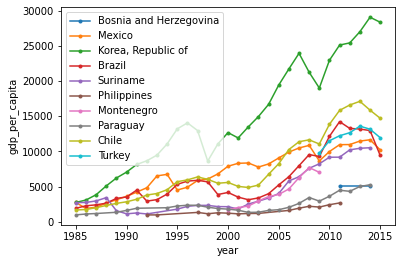

In [69]:
city_list = list({x:y for x,y in positive_relation.items()})
for country in city_list[:10]:
    plt.plot(df_gdp[country].index,df_gdp[country].values, label=country, marker=".")
plt.xlabel("year")
plt.ylabel("gdp_per_capita")
plt.legend()
plt.show()

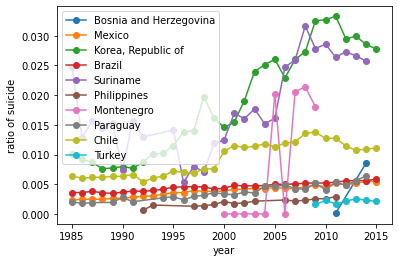

In [38]:
for country in city_list[:10]:
    plt.plot(df_total[country].index,df_total[country].values, label=country, marker="o")
plt.xlabel("year")
plt.ylabel("ratio of suicide")
plt.legend()
plt.show()

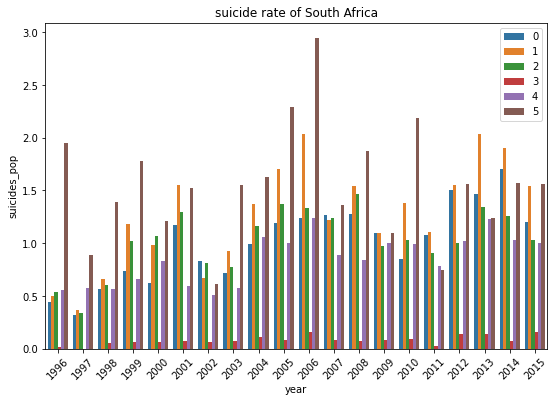

In [70]:
plt.figure(figsize = (9,6))
sns.barplot(x="year", y="suicides_pop", hue="age",
            ci = None,data = (df[df["country"] == "South Africa"]) )
plt.xticks(rotation = 45)
plt.title("suicide rate of South Africa" )
plt.legend()    
plt.show()

In [73]:
without_relation_gdp = {x:y for x,y in corr_eff.items() if -0.9 < y < 0.9}
no_relation_gdp = [i for i in country_list[:20] if i in without_relation_gdp.keys()]
no_relation_gdp

['Russian Federation',
 'Sri Lanka',
 'Belarus',
 'Latvia',
 'Kazakhstan',
 'Estonia',
 'Ukraine',
 'Finland',
 'Japan',
 'Belgium',
 'Guyana',
 'Croatia',
 'France',
 'Mongolia',
 'Serbia',
 'Korea, Republic of']

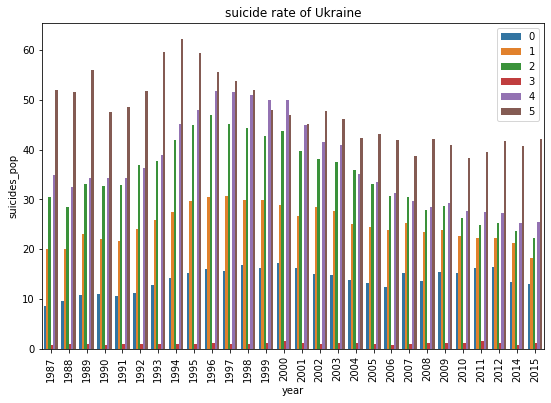

In [75]:
plt.figure(figsize = (9,6))
sns.barplot(x="year", y="suicides_pop", hue="age",
            ci = None,data = (df[df["country"] == 'Ukraine']) )
plt.xticks(rotation = 90)
plt.title("suicide rate of Ukraine" )
plt.legend()    
plt.show()